In [195]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [196]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head(15)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,2.901137e+09,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,2.905302e+11,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,2.259544e+11,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,6.669684e+09,2.157370e+06,11.35000


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [197]:

dfLE["GDP/Capita"] = (dfLE["GDP"]/dfLE["Population"])
dfLE.dropna(inplace=True)
dfLE[["Country","GDP/Capita"]].sample(10)



,Country,GDP/Capita
164,Sweden,32350.966244
170,Timor-Leste,397.483023
122,Nigeria,1456.040068
114,Myanmar,536.205974
33,Chile,5677.906861
111,Montenegro,4922.207098
174,Tunisia,2942.049453
134,Portugal,10749.159279
144,Samoa,2019.495051
133,Poland,4820.882331


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

Regular (density) distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

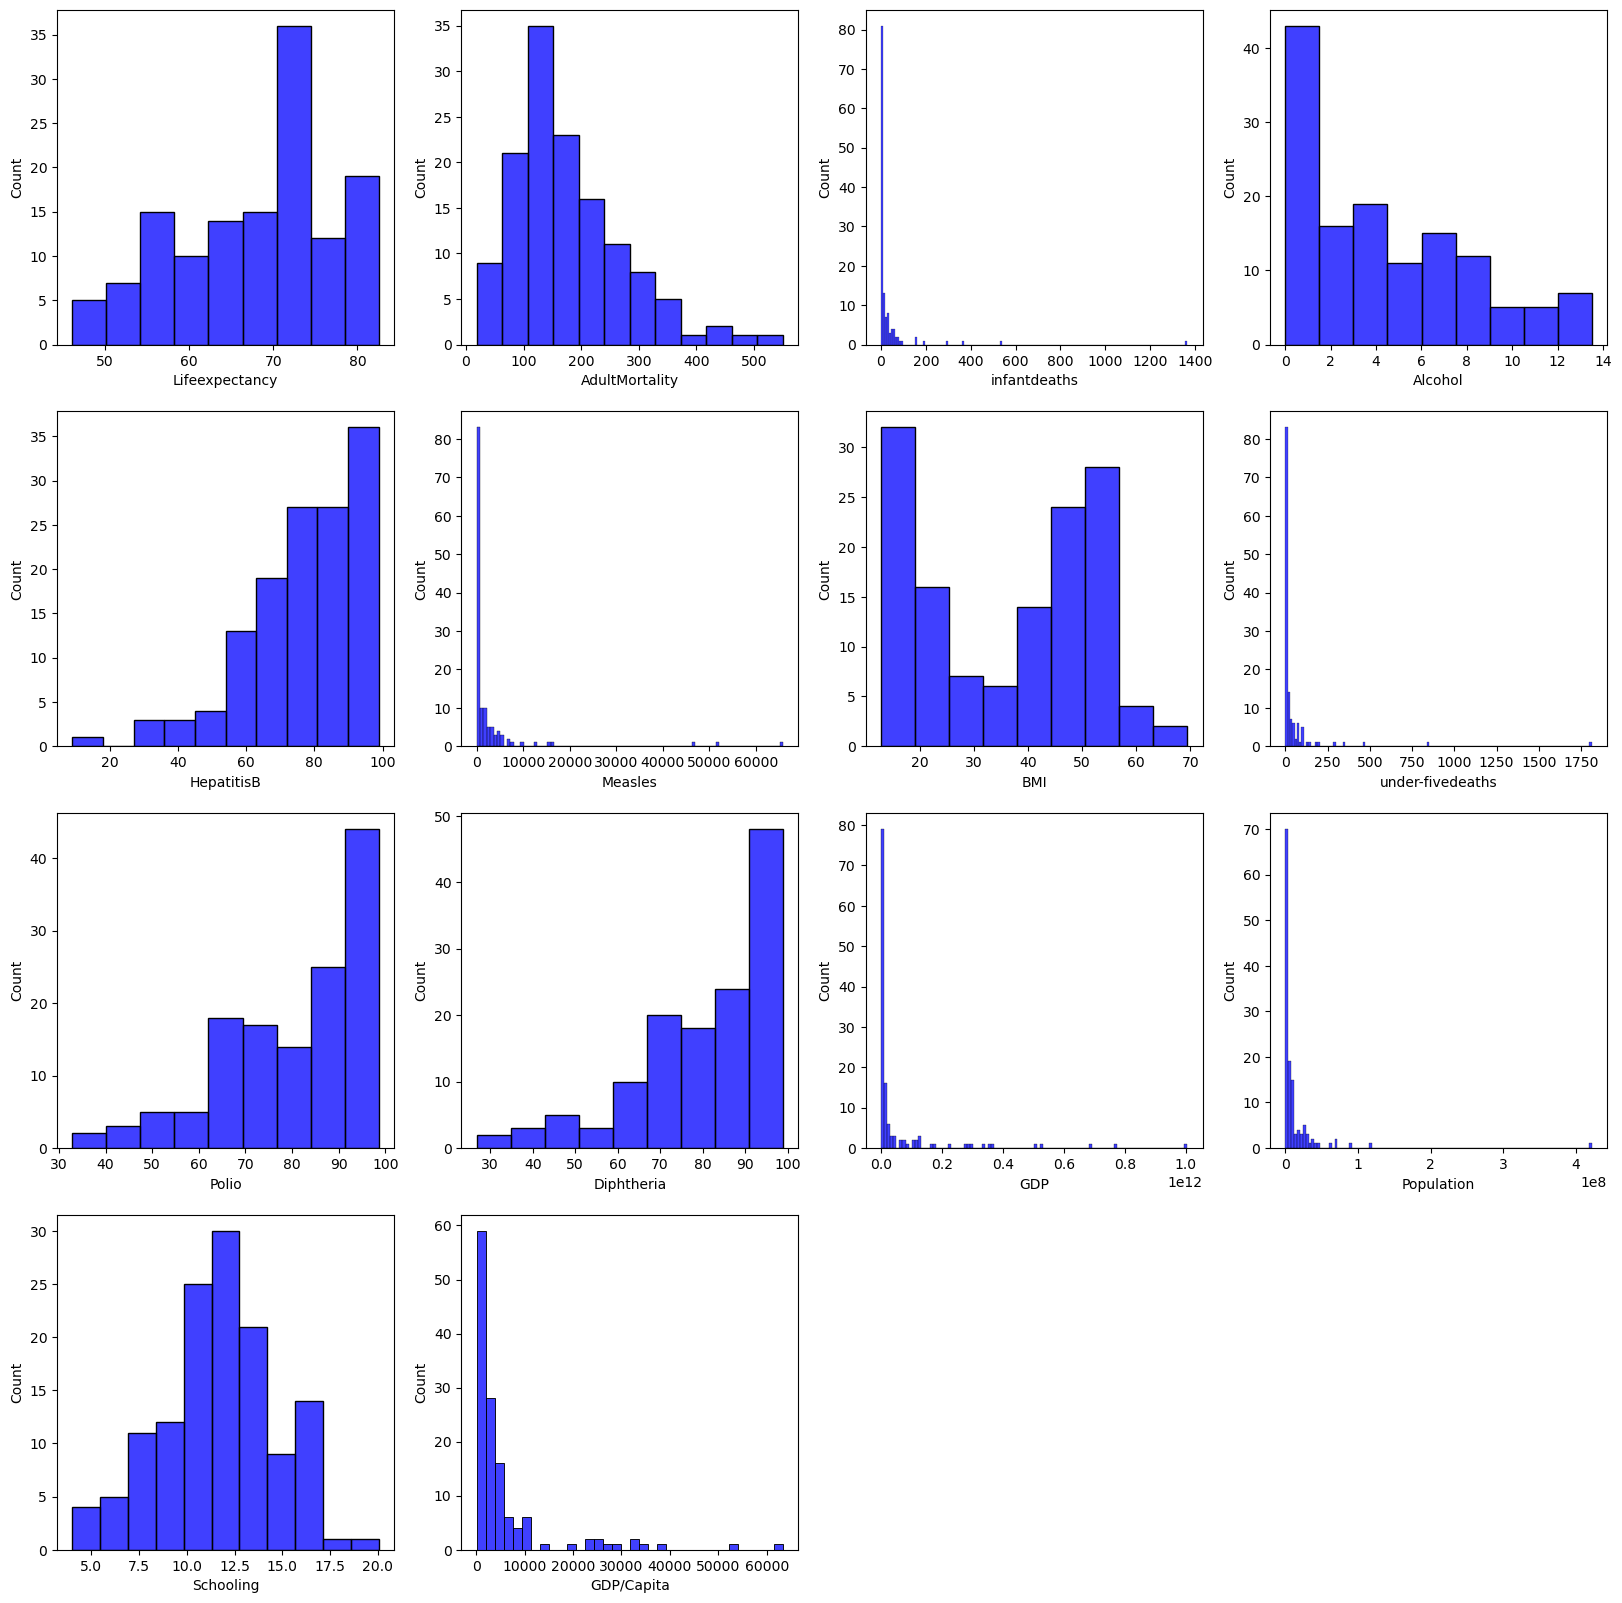

In [241]:
df = dfLE.drop(columns=["Country","isDeveloped"])
j=1
plt.figure(figsize=(20,20))
for i in df:
    plt.subplot(4,4,j)
    sns.histplot(df[i],color="blue")
    #sns.ecdfplot(data=df[i], color="red")
    
    j=j+1
plt.tight_layout

Cumulative distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

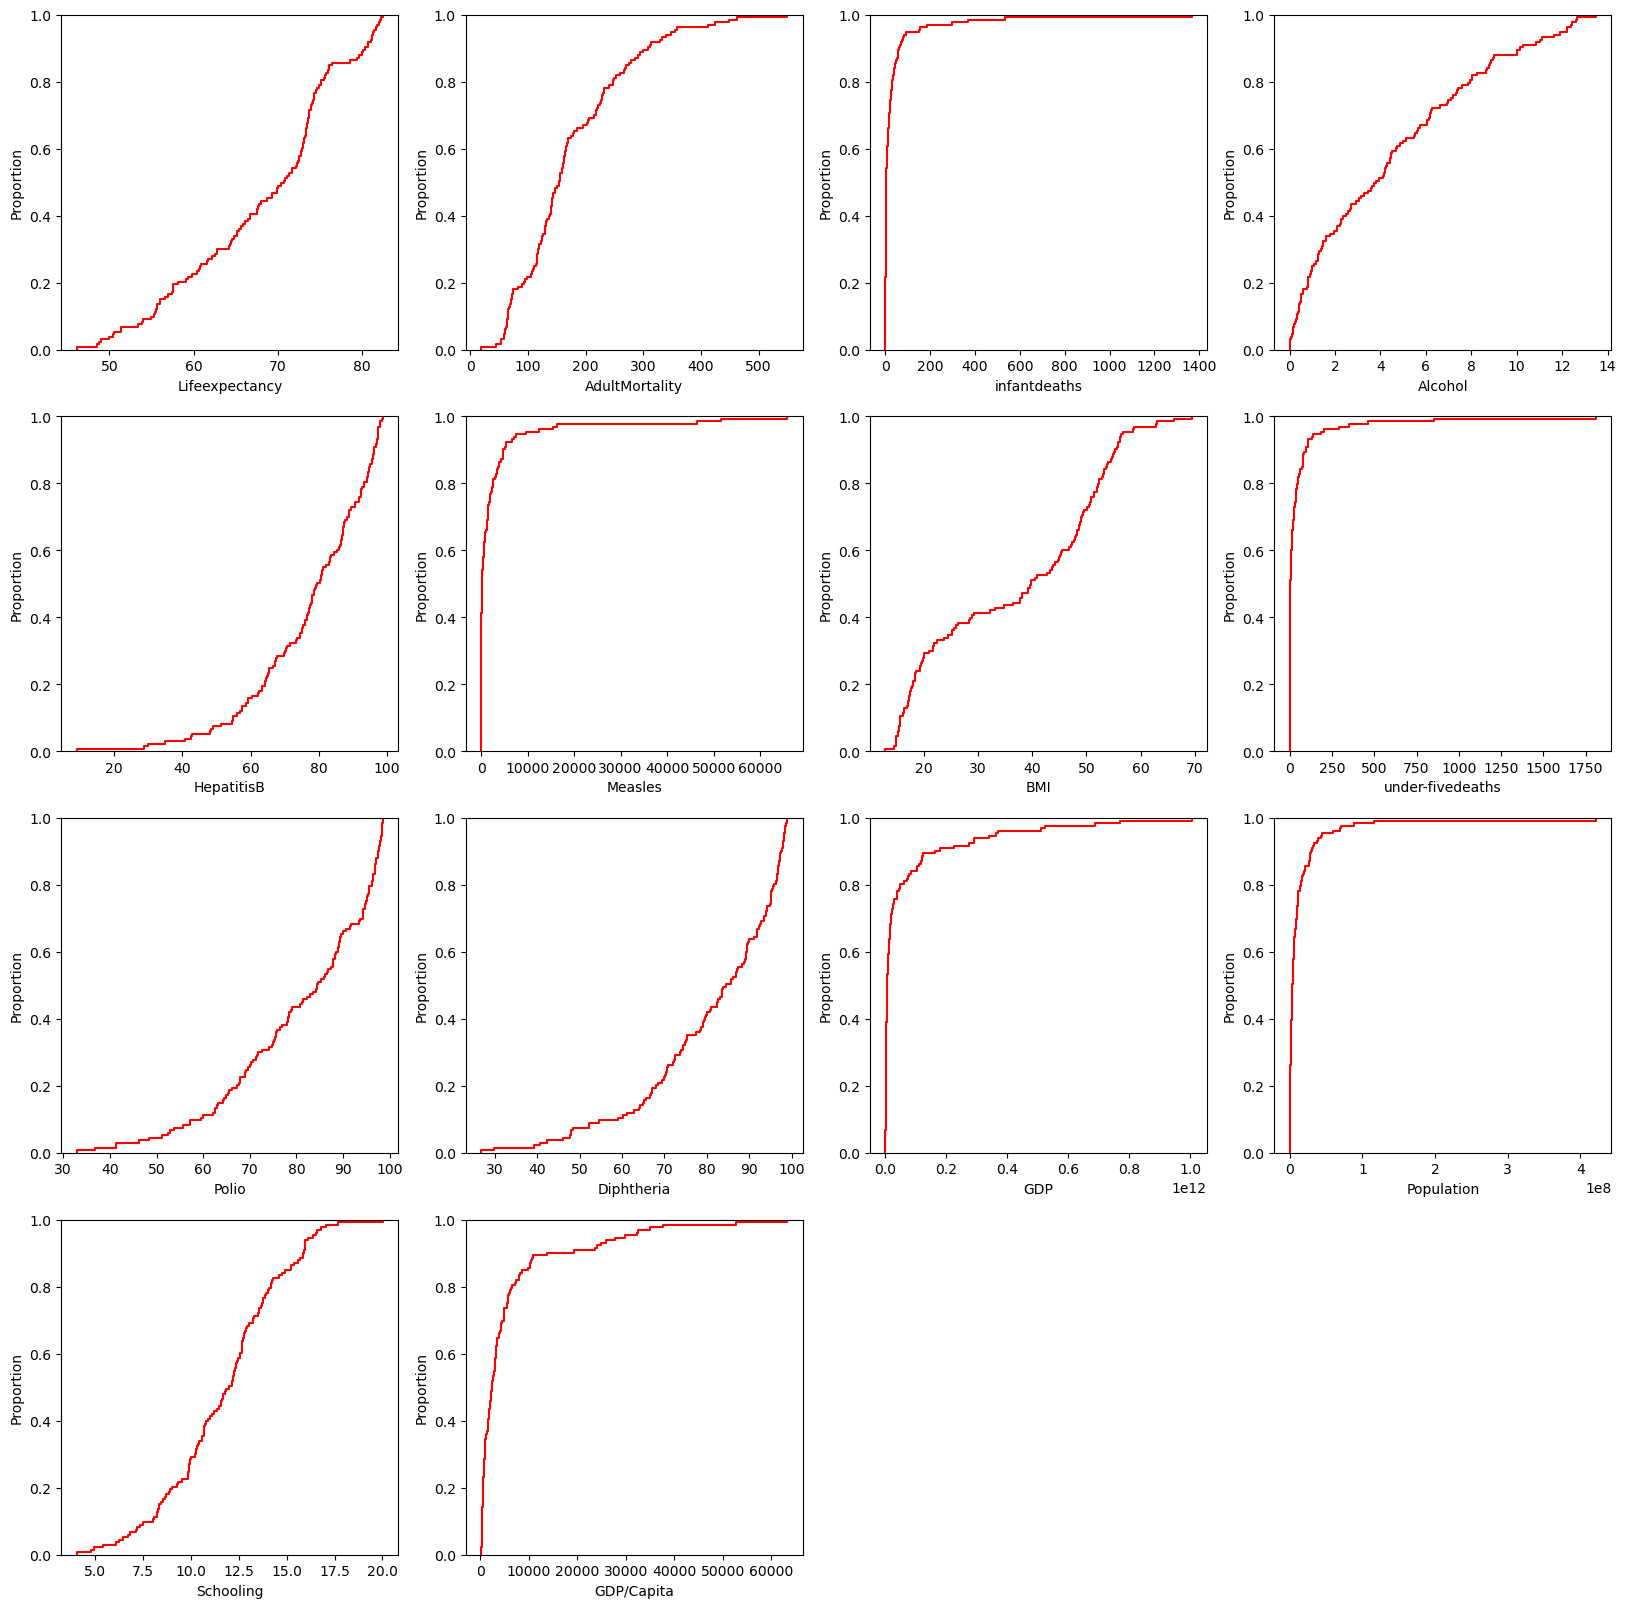

In [242]:
df = dfLE.drop(columns=["Country","isDeveloped"])
j=1
plt.figure(figsize=(20,20))
for i in df:
    plt.subplot(4,4,j)
    sns.ecdfplot(data=df[i], color="red")
    
    j=j+1
plt.tight_layout

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

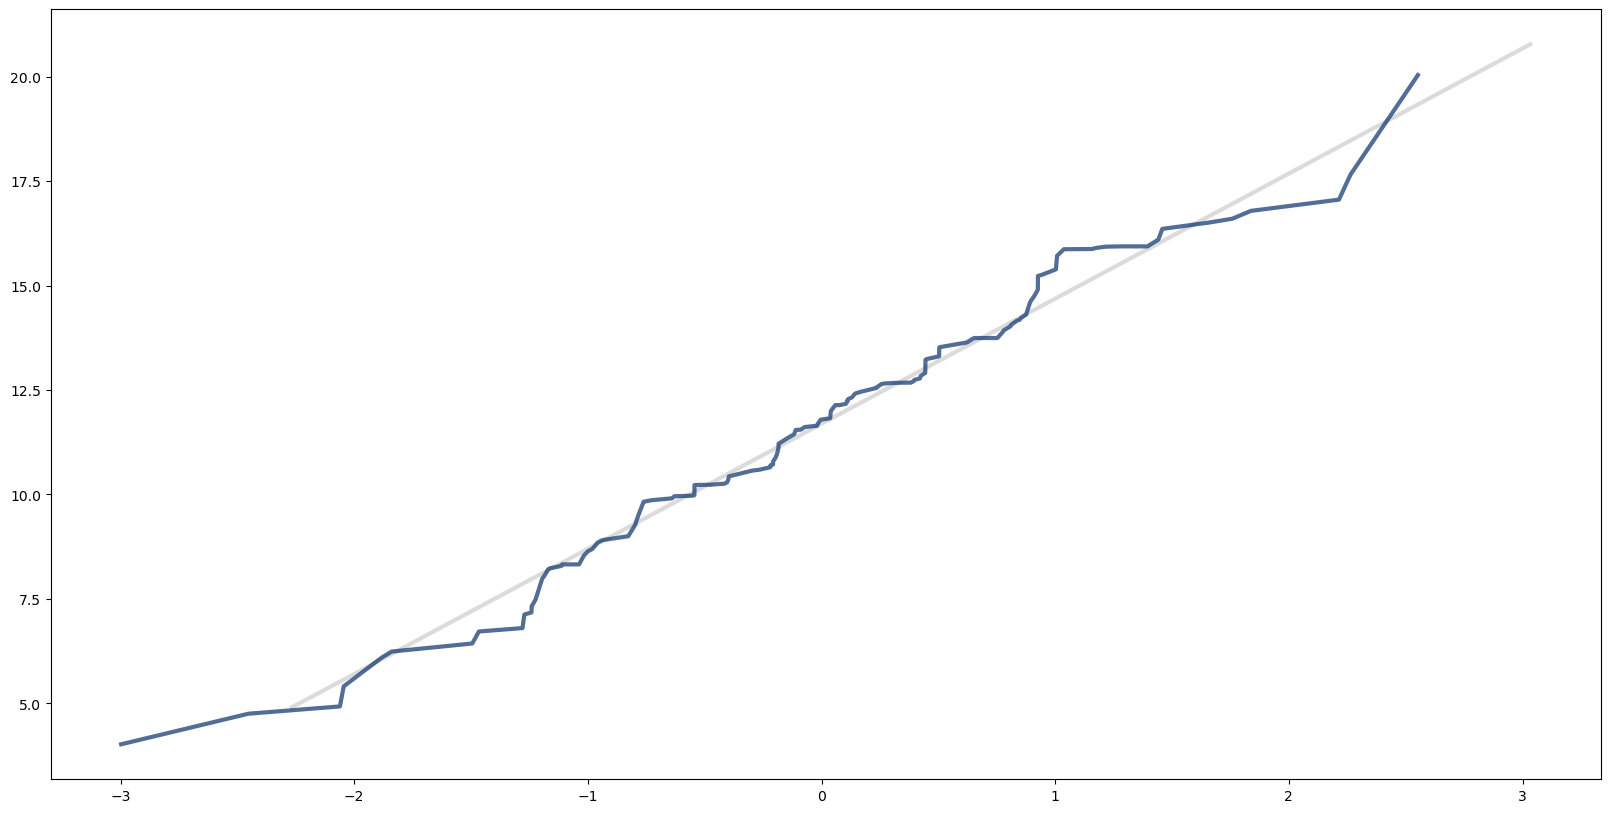

In [199]:
# Plotting normal distribution
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])

From above graph schooling data looks like normally distributed.
Let's check it using null hypothesis

In [200]:
import scipy.stats
k2, p = scipy.stats.normaltest(dfLE["Schooling"])
p

0.8061408621435778

Schooling data is normally distributed based on our null hypothesis.

In [201]:
#Analytical for Schooling

school_mu = dfLE["Schooling"].mean()
school_sigma = dfLE["Schooling"].std()
school_normz = ss.norm(school_mu,school_sigma)

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

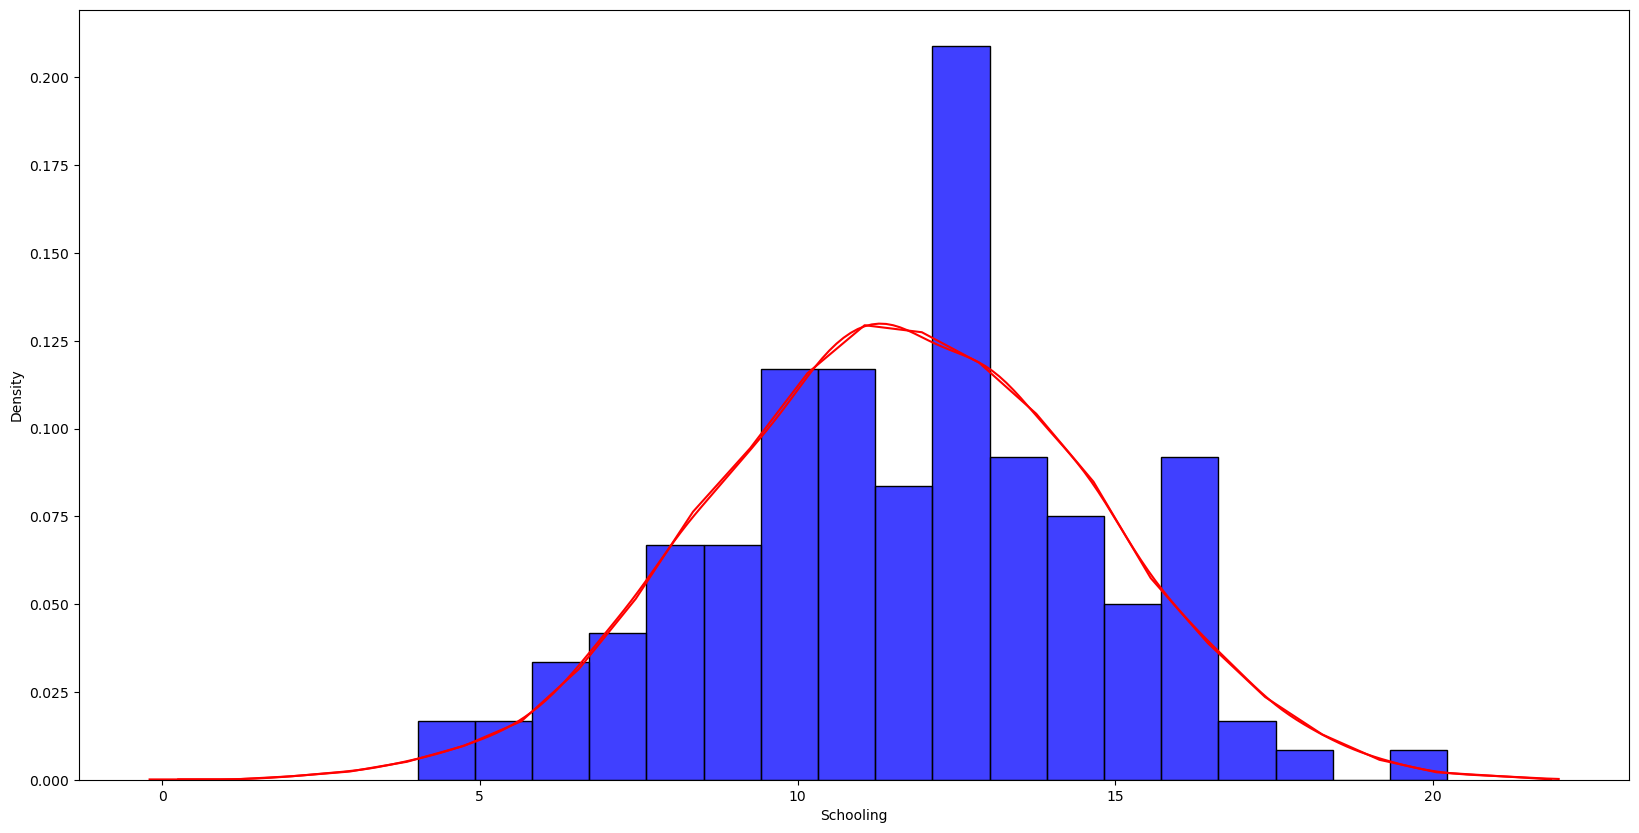

In [202]:
# analytical (Red) and Empirical(Blue) distribution for schooling
plt.clf()
sns.histplot(data=school_normz.rvs(10000), binwidth=0.9, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=round(dfLE["Schooling"],4), binwidth=0.9, color="blue", stat="density")

Percentage of that have a schooling level within 1 year of Canada. 

In [224]:
# Using CDF
cdf= thinkstats2.Cdf(dfLE["Schooling"])
dfc= dfLE[dfLE["Country"]=="Canada"]
dfc=dfc["Schooling"].iloc[0]
canPercent=(cdf.PercentileRank(dfc+1))-(cdf.PercentileRank(dfc-1))
print('{:.2f} % of countries have schooling level within 1 year of canada'.format(canPercent))

13.53 % of countries have schooling level within 1 year of canada


In [223]:
# Using analytical distribution
canPercent=(school_normz.cdf(dfc+1))-(school_normz.cdf(dfc-1))
print('{:.2f} % of countries have schooling level within 1 year of canada'.format(canPercent*100))

10.25 % of countries have schooling level within 1 year of canada


### Part 3: Create another analytical distribution for GDP per Capita (20pts) 

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

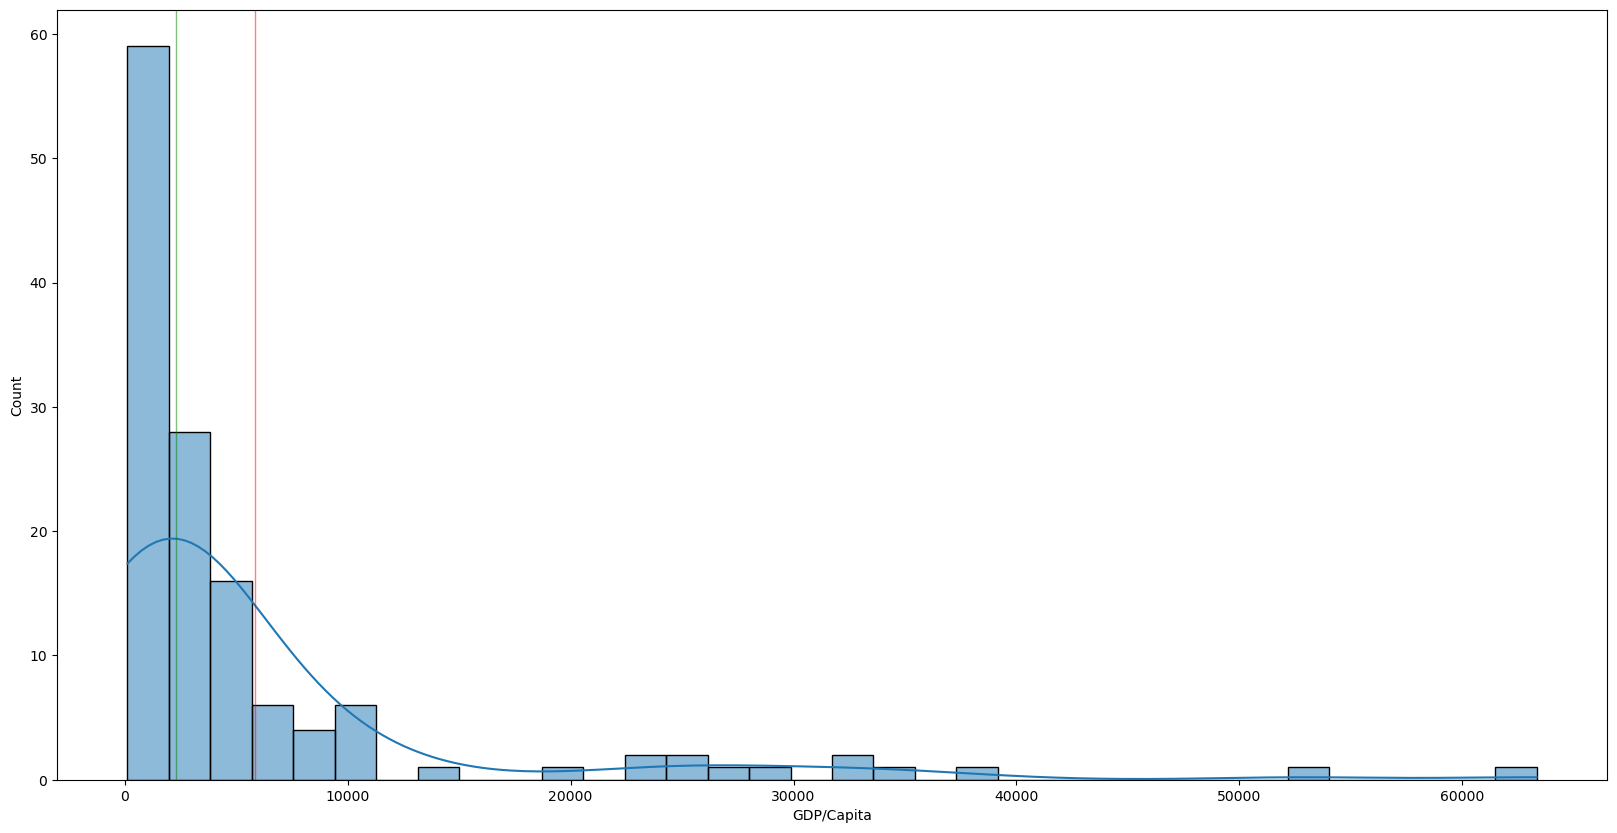

In [235]:
sns.histplot(dfLE["GDP/Capita"],kde=True)
thinkplot.axvline(dfLE["GDP/Capita"].mean(), color="Red", label="Mean")
thinkplot.axvline(dfLE["GDP/Capita"].median(), color="Green", label="Median")

GDP per Capita looks like log normal and positive skewed.


Let's transform our Gdp per capita to log normal and check our distribution.

Log normal distribution

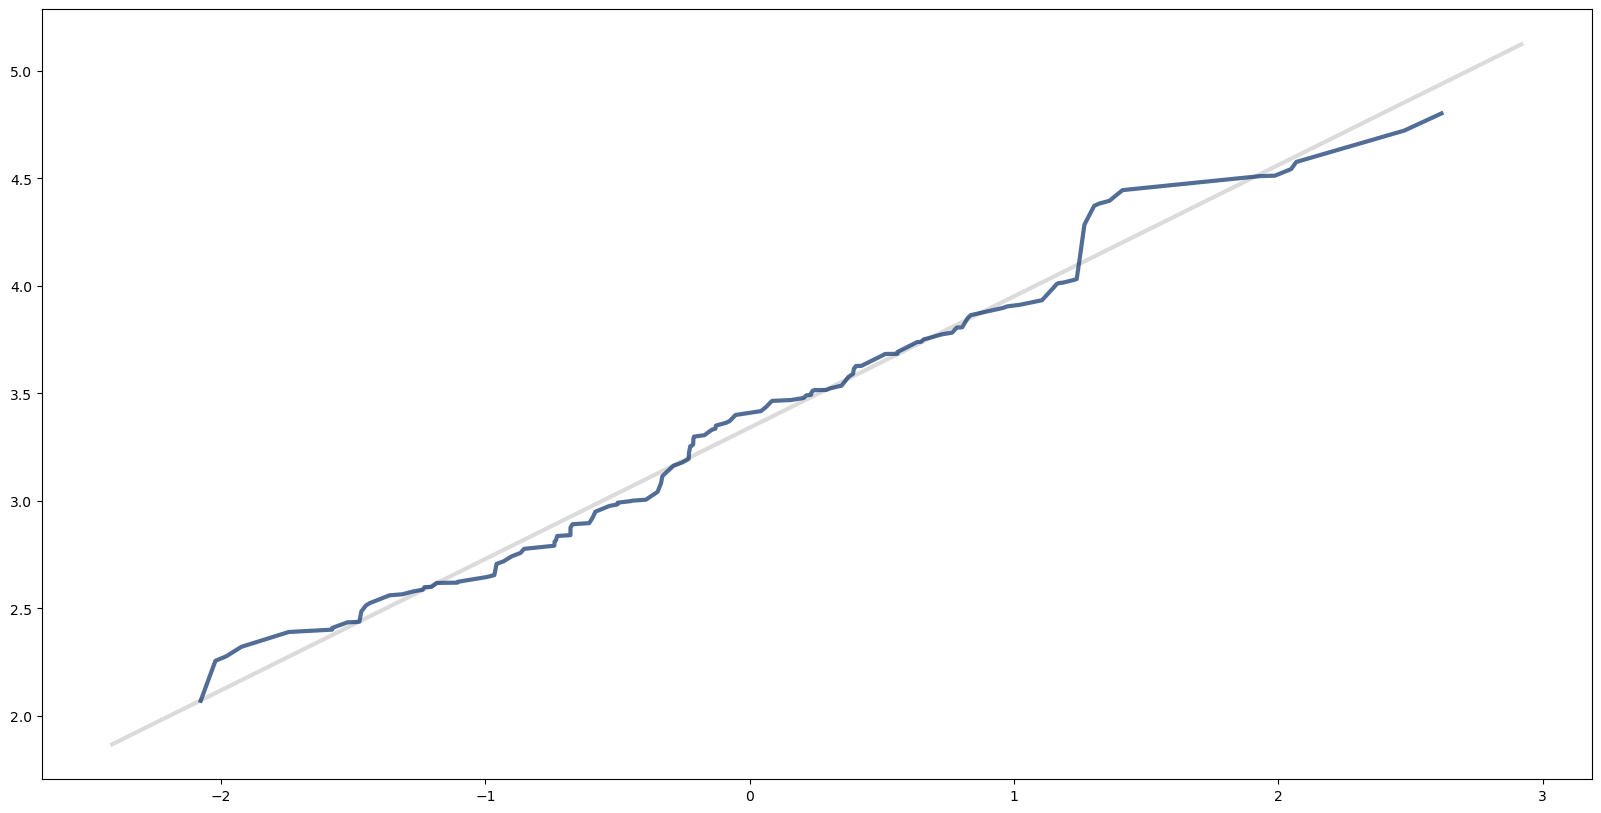

In [228]:
GDPperCap_log=np.log10(dfLE["GDP/Capita"])
thinkstats2.NormalProbabilityPlot(GDPperCap_log)

Based on our log normal distribution, empirical data is more or less similar to analytical distribution.

5 points for Using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?

CDF analytical model test

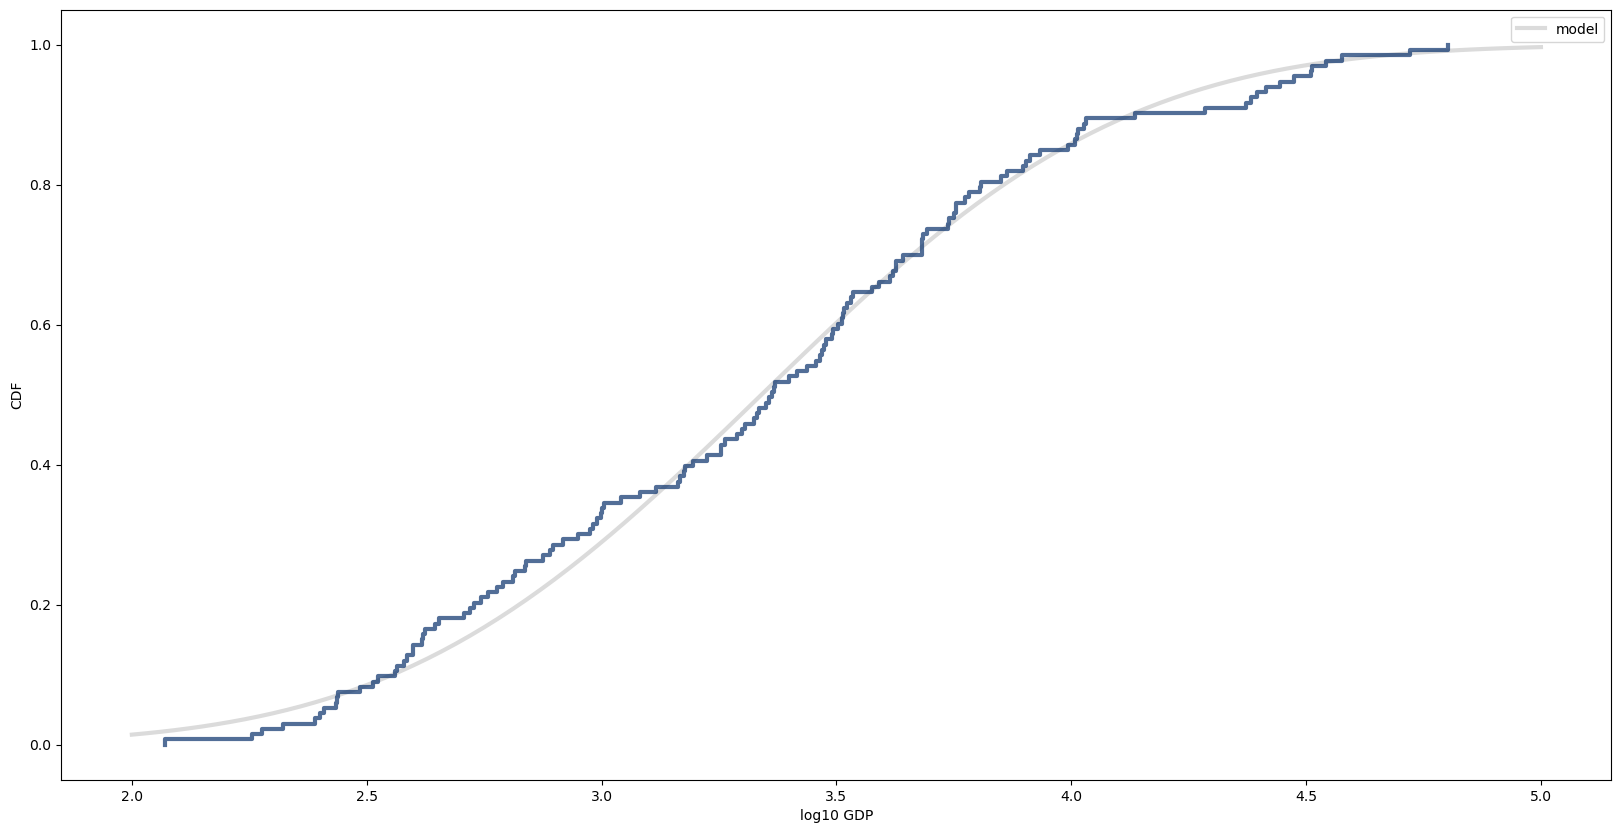

In [234]:
cdf_log = thinkstats2.Cdf(GDPperCap_log)
gdpCap_mu = GDPperCap_log.mean()
gdpCap_sigma = GDPperCap_log.std()

xs, ps = thinkstats2.RenderNormalCdf(gdpCap_mu, gdpCap_sigma, low=2, high=5)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 GDP', ylabel='CDF', loc='best')

From our model test, empirical data is almost alinged with analytical distribution. Our data is quite accurate and fits the model.
It seems GDP per capita is reliable and hence, I am not going to drop it.


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [210]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/Capita
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,6.023285e+10,1.340066e+07,11.691823,5831.130877
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,1.506979e+11,3.972571e+07,3.006460,10101.737928
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,1.213512e+09,1.007302e+06,9.868750,685.958218
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,6.161290e+09,3.735507e+06,12.000000,2306.960717
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,2.698236e+10,1.124072e+07,13.725000,5490.517494
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,1.004677e+12,4.214677e+08,20.037500,63337.610450


Filtering Outliers


Filtered measles above 10000 and adultmortality above 500.
Filtered Infant deaths and under-five deaths above 200 which is higher than median.
Removed Nan values and dropped Country column.
Filtered population above 80000000, since it is positively skewed and mean is way higher than median.

In [214]:
#dfLE= dfLE[dfLE["GDP"]<30000000000]
dfLE_out = dfLE.drop(columns=["Country"])
dfLE_out= dfLE_out[dfLE_out["Population"]<80000000]
dfLE_out=dfLE_out[dfLE_out["Measles"]<10000]
dfLE_out=dfLE_out[dfLE_out["infantdeaths"]<200]
dfLE_out=dfLE_out[dfLE_out["under-fivedeaths"]<200]
dfLE_out=dfLE_out[dfLE_out["AdultMortality"]<500]



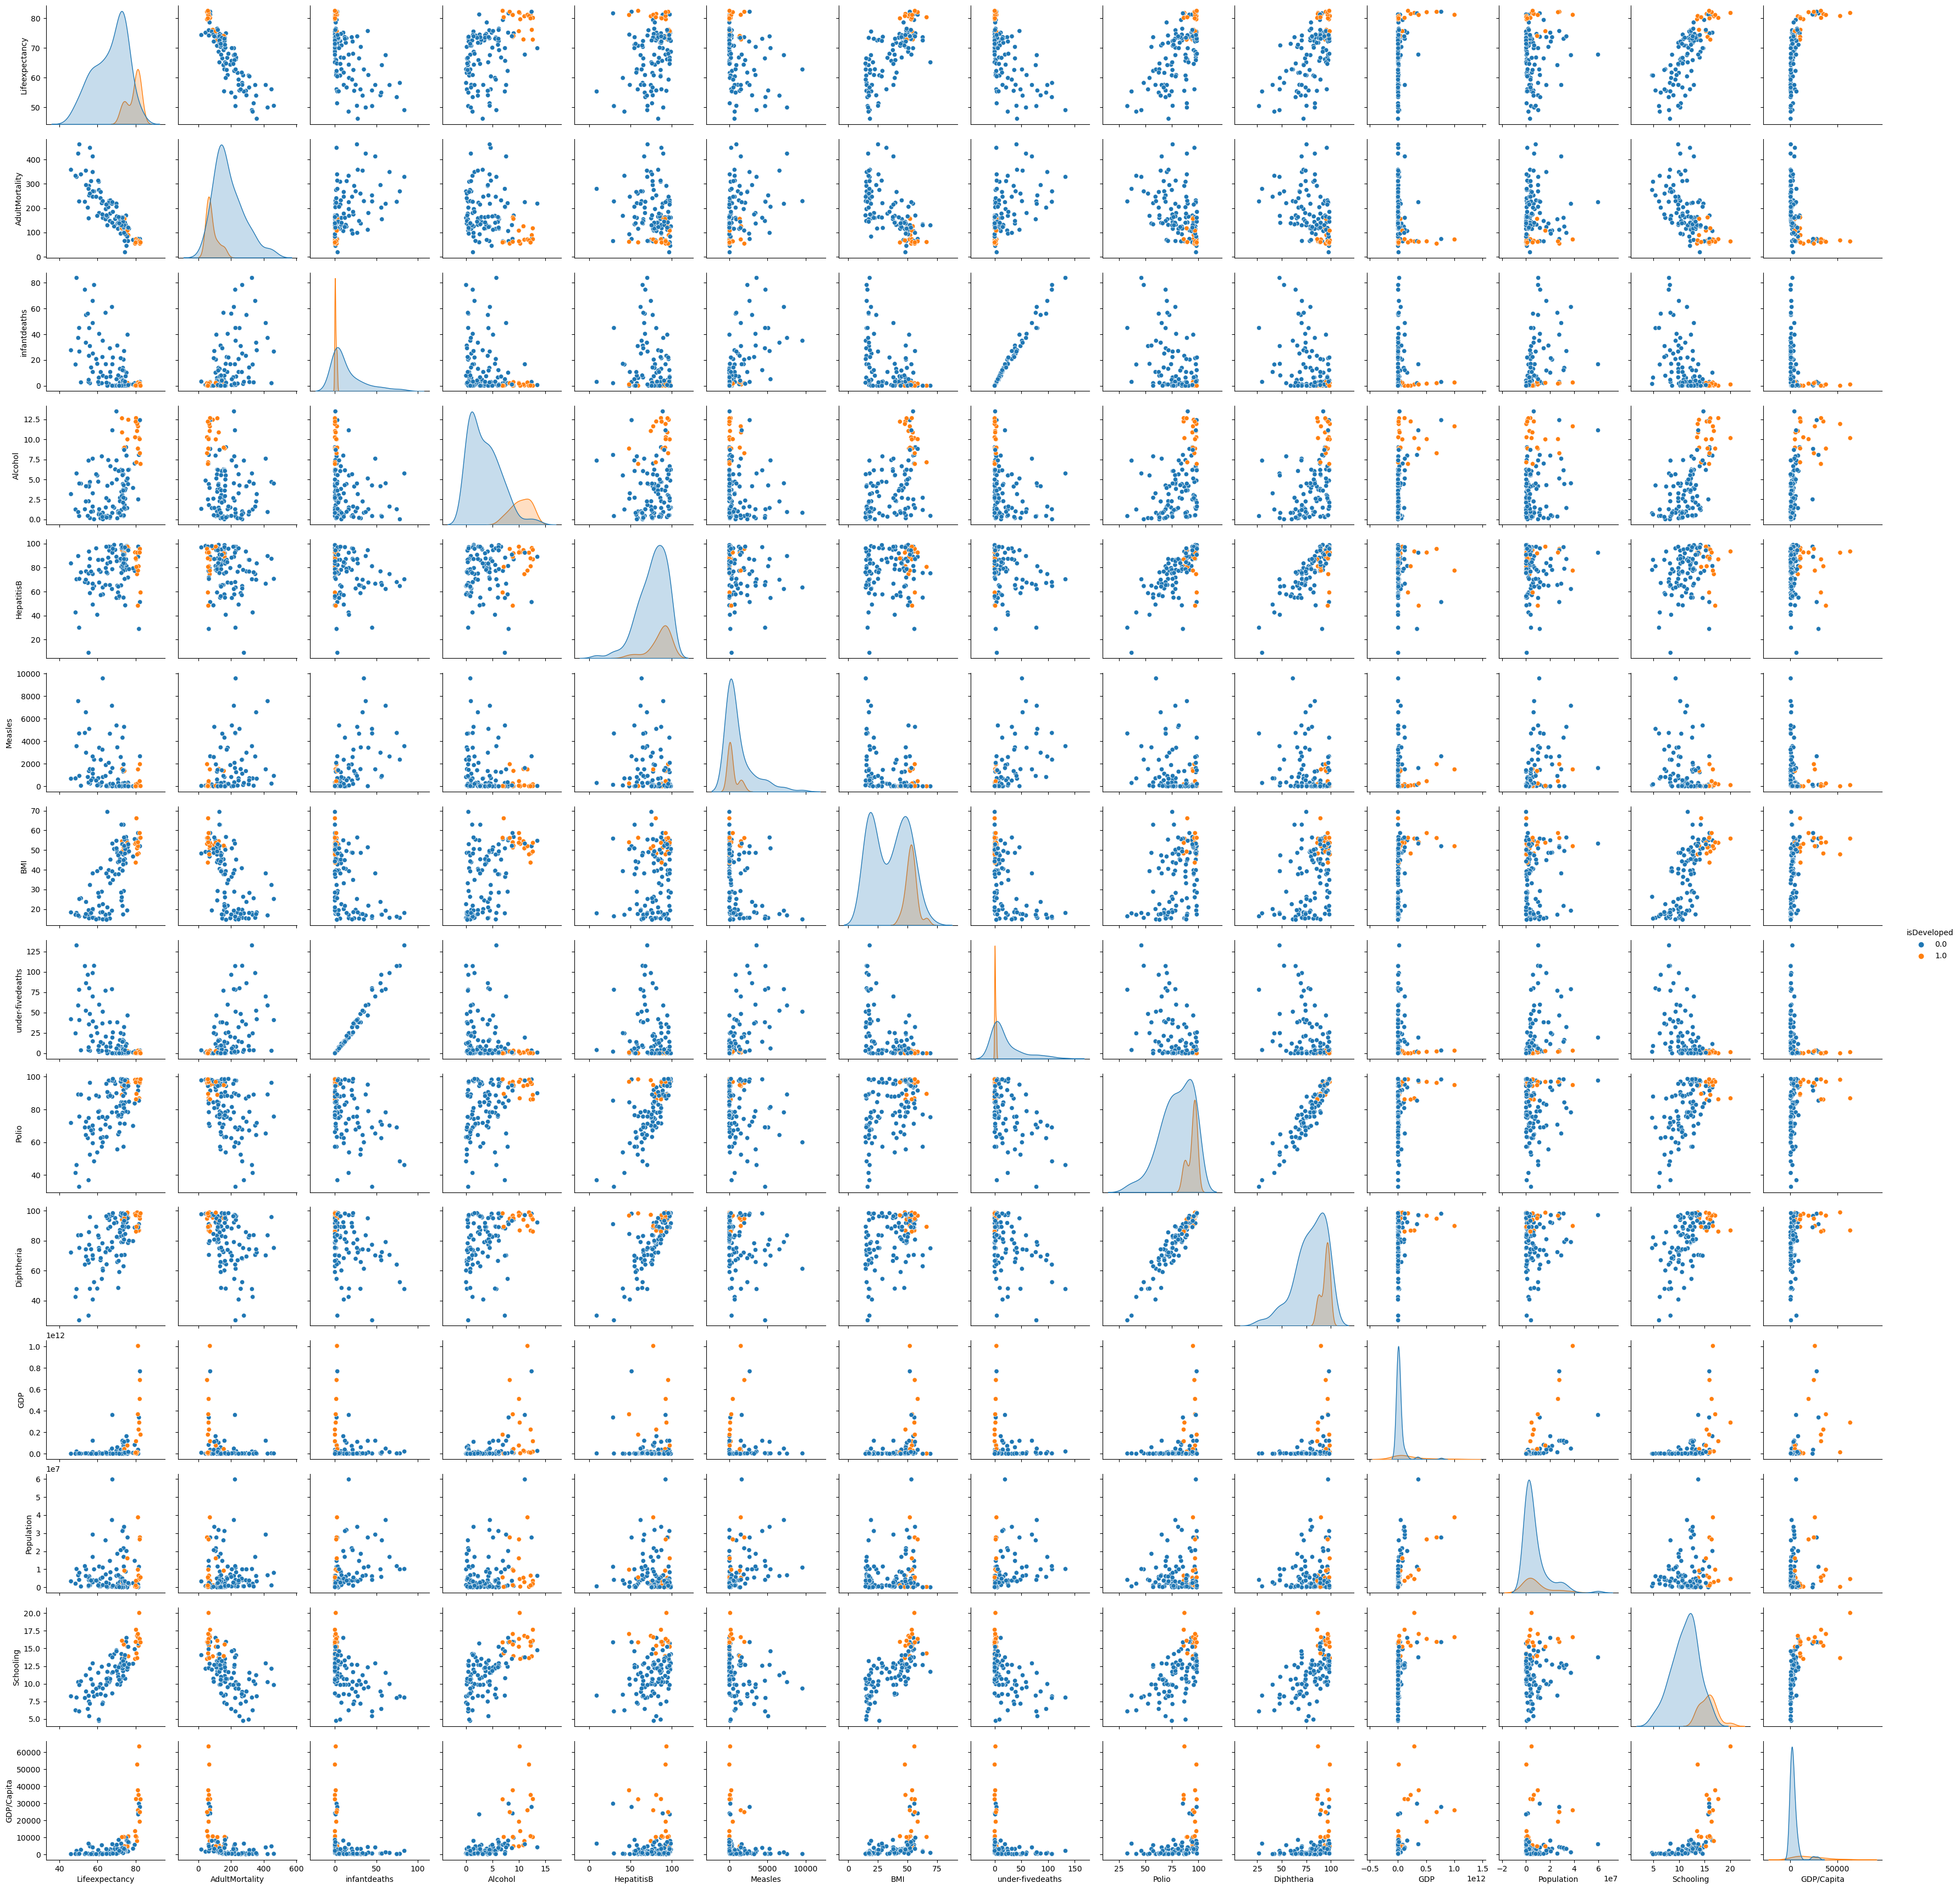

In [215]:
#Visualize correlations. 

sns.pairplot(dfLE_out, dropna= True,hue="isDeveloped")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

Heatmap and Correlation of developed countries

In [216]:
#Calculate correlations and analyze. 
corr_dev = dfLE.apply(pd.to_numeric, errors='coerce')
corr_dev=corr_dev[corr_dev["isDeveloped"]==1]
corr_dev = corr_dev.drop(columns=["Country","isDeveloped"])
corr_dev = corr_dev.corr()
corr_dev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/Capita
Lifeexpectancy,1.000000,-0.899359,-0.057183,-0.171770,-0.444695,-0.086277,0.199851,-0.017819,0.034499,-0.158312,0.490596,0.287785,0.418105,0.620499
AdultMortality,-0.899359,1.000000,0.216727,-0.005333,0.334286,0.178315,-0.165426,0.183252,-0.022663,0.093680,-0.344043,-0.148966,-0.289023,-0.496477
infantdeaths,-0.057183,0.216727,1.000000,-0.221295,0.135308,0.719403,0.157665,0.986796,0.207134,0.049995,0.593179,0.781328,0.085720,-0.119084
Alcohol,-0.171770,-0.005333,-0.221295,1.000000,0.367880,-0.158748,-0.683514,-0.180704,-0.279539,-0.200160,-0.098270,-0.114638,0.045575,0.045979
HepatitisB,-0.444695,0.334286,0.135308,0.367880,1.000000,0.154259,-0.112131,0.122126,-0.160261,-0.053976,-0.200392,-0.019519,-0.261785,-0.247542


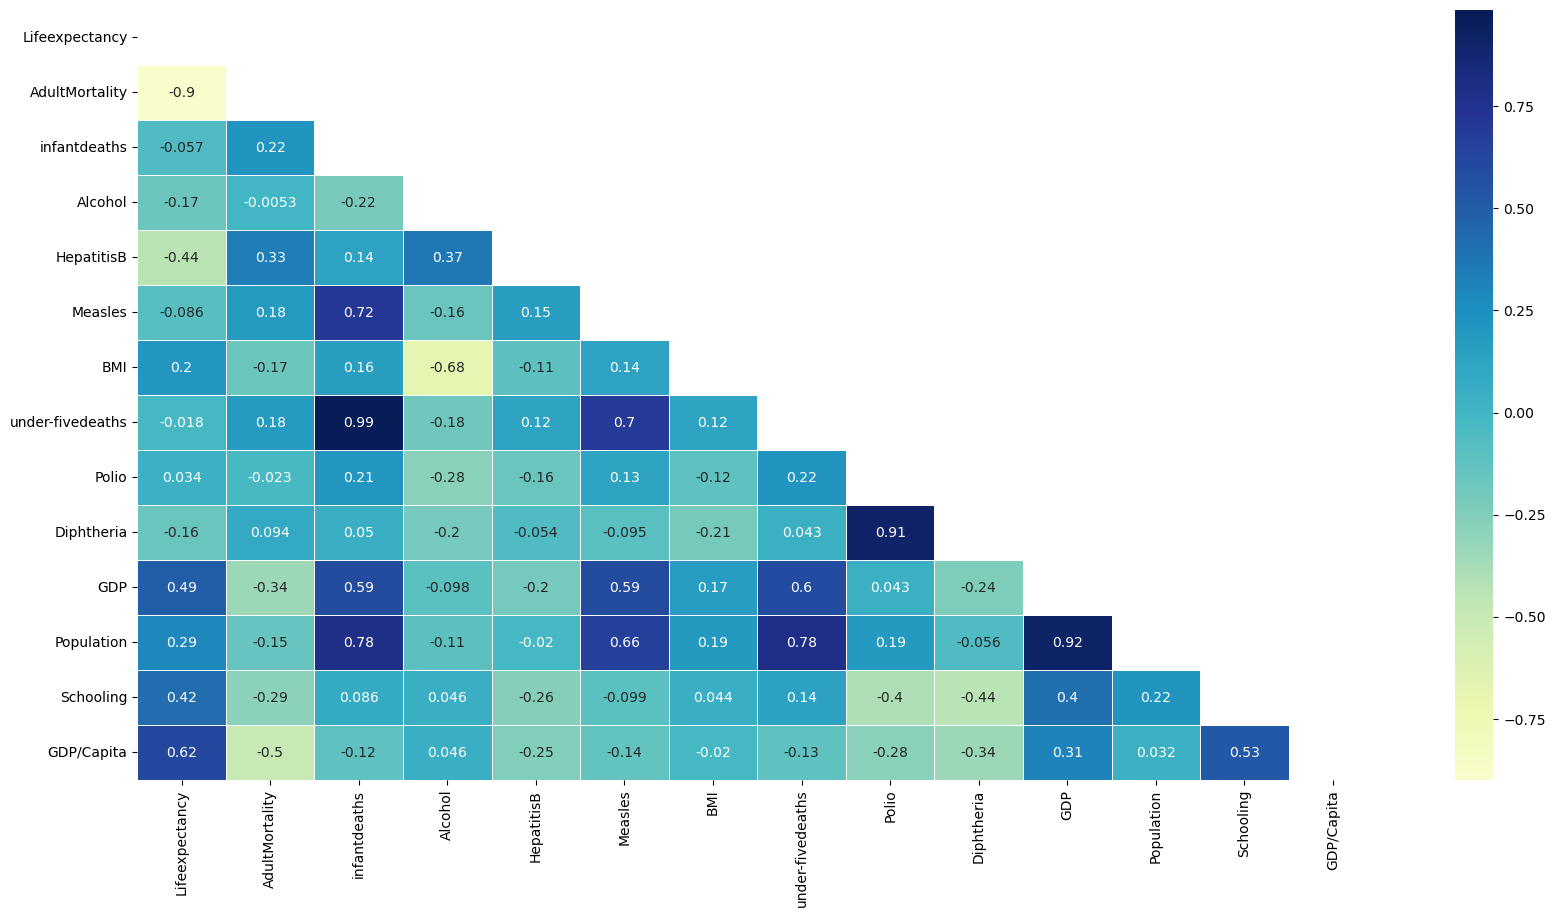

In [217]:
mask = np.triu(np.ones_like(corr_dev, dtype=bool))
sns.heatmap(corr_dev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

<ul>
The three strongest correlations of life expectancy for developed countries are:
    <li>GDP: 0.49
    <li>AdultMortality: -0.9
    <li>Hepatitis B: -0.44

Heatmap and Correlation of not developed countries

In [218]:
corr_ndev = dfLE.apply(pd.to_numeric, errors='coerce')
corr_ndev=corr_ndev[corr_ndev["isDeveloped"]==0]
corr_ndev = corr_ndev.drop(columns=["Country","isDeveloped"])
corr_ndev = corr_ndev.corr()
corr_ndev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/Capita
Lifeexpectancy,1.000000,-0.854801,-0.130055,0.234216,0.315167,-0.123550,0.704622,-0.159256,0.585020,0.588198,0.266061,-0.004356,0.723746,0.516382
AdultMortality,-0.854801,1.000000,0.012137,-0.038327,-0.148156,0.003598,-0.546226,0.032772,-0.362824,-0.337636,-0.177797,-0.044995,-0.453928,-0.351728
infantdeaths,-0.130055,0.012137,1.000000,-0.052514,-0.296759,0.727416,-0.263817,0.996890,-0.201312,-0.193709,0.248851,0.911464,-0.172519,-0.113801
Alcohol,0.234216,-0.038327,-0.052514,1.000000,0.024648,0.022499,0.366599,-0.044058,0.256422,0.238434,0.396137,-0.005090,0.529299,0.486238
HepatitisB,0.315167,-0.148156,-0.296759,0.024648,1.000000,-0.240508,0.199874,-0.311084,0.765539,0.779146,-0.129230,-0.226902,0.329309,-0.035143


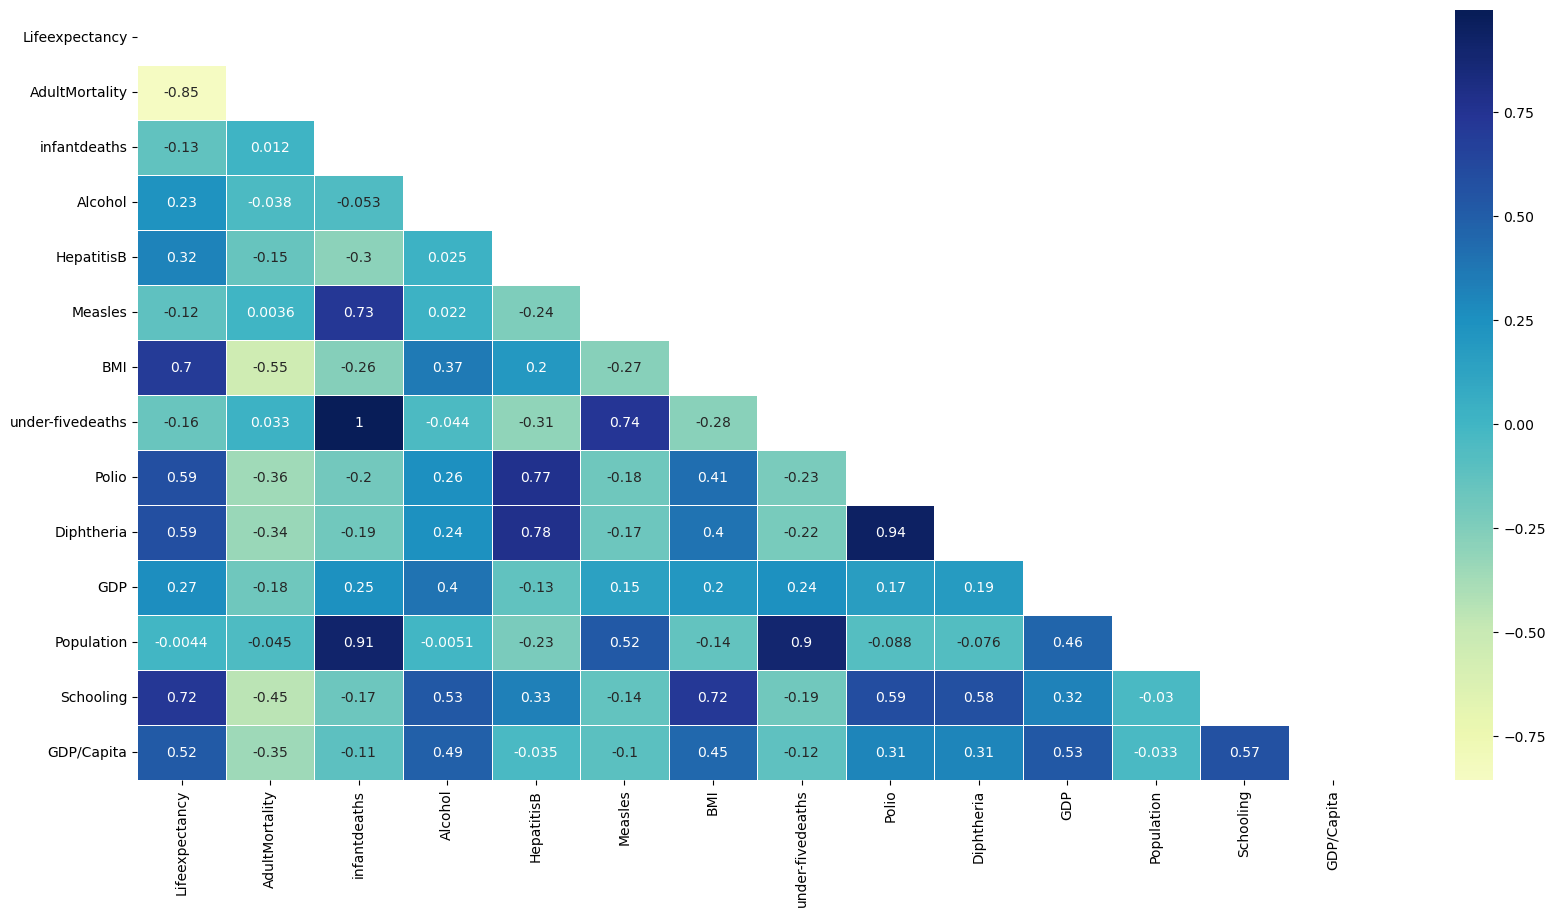

In [219]:
mask = np.triu(np.ones_like(corr_ndev, dtype=bool))
sns.heatmap(corr_ndev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()


<ul>The three strongest correlations of life expectancy for not developed countries are:
    <li>BMI: 0.7
    <li>AdultMortality: -0.85
    <li>Schooling: 0.72

10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?

10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

Alcohol, under five deaths